## Исследование надёжности заёмщиков  

### Описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.  

### Описание данных  

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

<a id='back'><a/> 
# Задачи исследования
    
### [1. Изучение данных](#1)
### [2. Предобработка данных](#2)
#### [2.1 Обработка пропусков](#2.1)
#### [2.2 Замена типа данных](#2.2)
#### [2.3 Обработка дубликатов](#2.3)
#### [2.4. Лемматизация](#2.4)
#### [2.5. Категоризация данных](#2.5)
### [3. Ответьте на вопросы](#3)
#### [3.1 Есть ли зависимость между наличием детей и возвратом кредита в срок?](#3.1)
#### [3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?](#3.2)
#### [3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#3.3)
#### [3.4 Как разные цели кредита влияют на его возврат в срок?](#3.4)
### [4. Общий вывод](#4)

<a id='1'><a/> 
## 1. Изучение данных
[Назад к оглавлению](#back)

In [1]:
#импортируем необходимые для работы библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#прочитаем таблицу и сохраним ее в переменную data
data = pd.read_csv('/datasets/data.csv')

#ознакомимся с первыми 20 строками таблицы
data.head(20)    

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
#посмотрим общие сведения о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Вывод

При первом визуальном ознакомлении с данными мы видим, что есть пропущенные значения в столбцах "days_employed" и "total_income". В значениях трудового стажа есть выбросы в данных - аномально большой стаж работы и минусовые значения. В столбце "education" присутствуют значения как с маленькой, так и с заглавной буквы или написанные капслоком. В столбце "purpose" встречаются различные вариации написания одной и той же категории, что может усложнить процесс анализа. Данные содержащие числа разных типов (целочисленные и вещественные). Так же в данных могут присутствовать аномалии или артефакты, которых не видно при первом визуальном ознакомлении. Необходимо проверить все данные и провести отчистку для дальнейшего анализа.

<a id='2'><a/> 
## 2. Изучение данных
[Назад к оглавлению](#back)

<a id='2.1'><a/> 
### 2.1 Обработка пропусков
[Назад к оглавлению](#back)

In [3]:
#посмотрим на пропуски в столбце 'days_employed'
data[data['days_employed'].isnull()].head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости


In [4]:
#подсчитаем количество строк без указания рабочего стажа
data[data['days_employed'].isnull()].count()

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64

В данном случае из 21525 строк в 2174 рабочий стаж и ежемесячный доход отсутствуют.

### Вывод

В данных присутствуют пропуски в столбцах "days_employed"(рабочий стаж) и "total_income"(ежемесячный доход). У появление этих пропусков может быть несколько причин: человек не хотел по каким-то причинам указывать данные; человек не работает и соответственно не имеет рабочего стажа (например студенты или женщины в декретном отпуске); человек может быть не устроен на работе официально и не имеет официального или стабильного заработка. Эти причины наиболее вероятны. Так же есть вероятность, что данные отсутствуют из-за технических сбоев.

Строк с пропущенными значениями достаточно много, при их удалении мы потеряем значительную часть ценных данных. Мы не знаем точных причин, почему человек не указал данные, поэтому заменили их на медианные значения далее, после дополнительной обработки и отчистки данных. В данном случае медианные значения подойдут лучше, чем средние или нулевые.

<a id='2.2'><a/> 
### 2.2 Замена типа данных
[Назад к оглавлению](#back)

In [5]:
#в таблице 21525 строк, мы не можем просмотреть все, поэтому переведем в нижний регистр все столбцы содержащие слова
data['education'] = data['education'].str.lower()
data['family_status'] = data['family_status'].str.lower()
data['income_type'] = data['income_type'].str.lower()
data['purpose'] = data['purpose'].str.lower()

In [6]:
#провирим данные по количеству детей
print('Минимальное количество детей:', data['children'].min())
print('Максимальное количество детей:', data['children'].max())

Минимальное количество детей: -1
Максимальное количество детей: 20


В данных присутствуют отрицательные значения, поэтому мы переведем значения столбца в положительные.

In [7]:
#переведем все отризательные значения в положительные 
data['children'] = abs(data['children'])

In [8]:
#провирим данные по рабочему стажу
print('Минимальный рабочий стаж:', data['days_employed'].min())
print('Максимальный рабочий стаж:', data['days_employed'].max())

Минимальный рабочий стаж: -18388.949900568383
Максимальный рабочий стаж: 401755.40047533


В этом столбце присутствуют как отрицательные значения, так и аномально высокие, как мы уже видели при первом визуальном ознакомлении с таблицей. Предположительно, они появились из-за технического сбоя. Предположим, что аномально высокие значения указаны в часах, а не в днях и переведем все данные в количество лет для удобства.

In [9]:
#переведем все отризательные значения в положительные 
data['days_employed'] = abs(data['days_employed'])

In [10]:
#для удоства переведем рабочий стаж из дней в годы
data['days_employed'] = data['days_employed'] / 365

In [11]:
#чтобы убедиться, что аномально высокий стаж указан в часах, проверим максимальный возраст 
data['dob_years'].max()

75

Если максимальный возраст составляет 75 лет, предположим, что максимальный рабочий стаж ровняется 60 годам.

In [12]:
#напишем функцию, которая переводит данные в таких строках из часов в годы
def year(data):
    
    if data['days_employed'] > 60:
        return data['days_employed'] / 24
    
    else:
        return data['days_employed']
    
data['days_employed'] = data.apply(year, axis=1)

In [13]:
#выведем первые 5 строк, чтобы убедиться, что замена прошла успешно
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,23.116912,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,11.026860,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,15.406637,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,11.300677,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,38.843159,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Теперь рабочий стаж, который был более 900 лет указан как 38 лет и пренадлежит человеку в возрасте 53, что похоже на правдоподобные цифры.

In [14]:
#посмотрим на таблицу, задав условия, что рабочий стаж больше возраста клиента
data[(data['dob_years'] - data['days_employed']) < 0].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,39.559546,0,среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,7.299379,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
157,0,39.773291,38,среднее,1,женат / замужем,0,F,пенсионер,1,113560.650035,сделка с автомобилем
270,3,5.130584,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,45.417416,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости


In [15]:
#посчитаем, сколько строк с таким несоотвествием
data[(data['dob_years'] - data['days_employed']) < 0].count()

children            145
days_employed       145
dob_years           145
education           145
education_id        145
family_status       145
family_status_id    145
gender              145
income_type         145
debt                145
total_income        145
purpose             145
dtype: int64

В масштабе данной выборки 71 строка это не так много и данные по рабочему стажу не представляют для нас особой важности, поэтому в оставшихся строках мы можем разделить рабочий стаж на 2, чтобы он стал меньше, чем возраст.

In [16]:
#напишем функцию, которая будет делить рабочий стаж на 2 при условии, что стаж больше, чем возраст клиента и оба 
def cut_days(data):
    if data['dob_years'] < data['days_employed']:
        if data['dob_years'] != 0 and data['days_employed'] != 0:
            return data['days_employed'] / 2
    else:
        return data['days_employed']
data['days_employed'] = data.apply(cut_days, axis=1)

In [17]:
#провирим данные по возрасту клиентов
print('Минимальный возраст:', data['dob_years'].min())
print('Максимальный возраст:', data['dob_years'].max())

Минимальный возраст: 0
Максимальный возраст: 75


Тут присутствуют нулевые значения, похоже, кто-то не указал свой возраст. Заменим нулевые значения на медианные по типам занятости.

In [ ]:
#создадим цикл, заменяющий нули в столбце 'dob_years' на медианные значения по типу занятости

for type in data['income_type'].unique().tolist():
    data['dob_years'].loc[data['total_income']== type].fillna(data['dob_years'].loc[data['total_income']== type].loc[data['dob_years']!=0].median())

In [18]:
#посмотрим, какой тип занятости имеют клиенты с ошибочным возрастом
data.loc[data['dob_years'] == 0, 'income_type'].value_counts()

сотрудник      55
компаньон      20
пенсионер      20
госслужащий     6
Name: income_type, dtype: int64

In [19]:
#найдем медианы возраста по типам занятости
dob_years_medians = data.groupby('income_type')['dob_years'].median()
dob_years_medians

income_type
безработный        38.0
в декрете          39.0
госслужащий        40.0
компаньон          39.0
пенсионер          60.0
предприниматель    42.5
сотрудник          39.0
студент            22.0
Name: dob_years, dtype: float64

In [20]:
#заменим значения
data.loc[(data['dob_years'] == 0) & (data['income_type'] == 'сотрудник'), 'dob_years'] = dob_years_medians[6]
data.loc[(data['dob_years'] == 0) & (data['income_type'] == 'пенсионер'), 'dob_years'] = dob_years_medians[4]
data.loc[(data['dob_years'] == 0) & (data['income_type'] == 'компаньон'), 'dob_years'] = dob_years_medians[3]
data.loc[(data['dob_years'] == 0) & (data['income_type'] == 'госслужащий'), 'dob_years'] = dob_years_medians[2]

In [21]:
#проверим минимальный возраст теперь
print('Минимальный возраст:', data['dob_years'].min())

Минимальный возраст: 19.0


Теперь мы можем заменить отсутствующие значения в столбцах. Заменим пропуски с столбце рабочего стажа.

In [22]:
#найдем медианное значение трудового стажа для типа занятости
medians_days_employed = data.groupby('income_type')['days_employed'].median()
round(medians_days_employed, 0)

income_type
безработный        21.0
в декрете           9.0
госслужащий         7.0
компаньон           4.0
пенсионер          42.0
предприниматель     1.0
сотрудник           4.0
студент             2.0
Name: days_employed, dtype: float64

In [23]:
data.loc[(data['days_employed'].isnull()) & (data['income_type'] == 'сотрудник'), 'days_employed'] = medians_days_employed[6]
data.loc[(data['days_employed'].isnull()) & (data['income_type'] == 'компаньон'), 'days_employed'] = medians_days_employed[3]
data.loc[(data['days_employed'].isnull()) & (data['income_type'] == 'пенсионер'), 'days_employed'] = medians_days_employed[4]
data.loc[(data['days_employed'].isnull()) & (data['income_type'] == 'госслужащий'), 'days_employed'] = medians_days_employed[2]
data.loc[(data['days_employed'].isnull()) & (data['income_type'] == 'предприниматель'), 'days_employed'] = medians_days_employed[5]

In [27]:
#проверим столбец с образованием
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [28]:
#проверим столбец с индексами образования
data['education_id'].unique()

array([0, 1, 2, 3, 4])

Тут с данными все в порядке, количество индексов совпадает с количеством вариантов образования.

In [29]:
#проверим столбец с семейным положением
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

In [30]:
#проверим столбец с индексами семейного положения
data['family_status_id'].unique()

array([0, 1, 2, 3, 4])

Тут так же все в порядке с данными.

In [31]:
#проверим столбец с указанием пола
data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [32]:
#узнаем сколько строк с ошибкой содержащей неизвестное значение
sum(data['gender'] == 'XNA')

1

In [33]:
#так как это всего одна строка, ее удаление не повляет на результаты анализа наших данных, 

#удалим строку
data = data.loc[data['gender'] != 'XNA']

In [34]:
#проверим столбец с указанием типа занятости
data['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [35]:
#проверим столбец с указанием задолженностей
data['debt'].unique()

array([0, 1])

In [36]:
#провирим данные в столбце ежемесячного дохода
print('Минимальный доход:', data['total_income'].min())
print('Максимальный доход:', data['total_income'].max())

Минимальный доход: 20667.26379327158
Максимальный доход: 2265604.028722744


In [37]:
#посмотрим, сколько строк со значением равным нулю
len([data['total_income'] == 0])

1

Всего одна строка. Остальные строки без указания заработной платы это Nan. Похоже, что природа появления таких пропусков по большей части техническая или же клиент не пожелал указывать доход, но точной причины мы не знаем. Поэтому заменим все отсутствующие значения на медианные в соответствие с типом занятости.

In [38]:
#проверим, в каких типах занятости встречаются пропущенные значения доходов.
data.loc[data['total_income'].isnull(), 'income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

In [39]:
#найдем медианы уровня зароботка по типам занятости
medians_total_income = data.groupby('income_type')['total_income'].median()
round(medians_total_income)

income_type
безработный        131340.0
в декрете           53829.0
госслужащий        150448.0
компаньон          172319.0
пенсионер          118514.0
предприниматель    499163.0
сотрудник          142594.0
студент             98202.0
Name: total_income, dtype: float64

In [40]:
#заменим нули медианными значениями
data.loc[(data['total_income'].isnull()) & (data['income_type'] == 'сотрудник'), 'total_income'] = medians_total_income[6]
data.loc[(data['total_income'].isnull()) & (data['income_type'] == 'компаньон'), 'total_income'] = medians_total_income[3]
data.loc[(data['total_income'].isnull()) & (data['income_type'] == 'пенсионер'), 'total_income'] = medians_total_income[4]
data.loc[(data['total_income'].isnull()) & (data['income_type'] == 'госслужащий'), 'total_income'] = medians_total_income[2]
data.loc[(data['total_income'].isnull()) & (data['income_type'] == 'предприниматель'), 'total_income'] = medians_total_income[5]

In [41]:
#посмотрим медианные значения по типу занятости
income_median = data.groupby('income_type').agg({'total_income':['count', 'median']})
income_median

total_income               
                       count         median
income_type                                
безработный                2  131339.751676
в декрете                  1   53829.130729
госслужащий             1459  150447.935283
компаньон               5084  172319.266339
пенсионер               3856  118514.486412
предприниматель            2  499163.144947
сотрудник              11119  142594.396847
студент                    1   98201.625314

In [42]:
#проверим, не осталось ли пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
children            21524 non-null int64
days_employed       21524 non-null float64
dob_years           21524 non-null float64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null float64
purpose             21524 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 2.8+ MB


### Вывод

Мы изучили данные и убрали аномалии - заменили отрицательные значения на положительные, убрали выбросы в виде слишком больших значений рабочего стажа (основной причиной было то, что некоторые данные были указаны в часах, а не днях, в других случаях, возможно, ошибки были вызваны сбоем) и артефакты. Пропущенные значения заменили на медианные в соответствии с типом занятости. Продолжим подготовку данных к дальнейшему анализу.

### Замена типа данных

In [44]:
#посмотрим на информацию по нашим данным
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
children            21524 non-null int64
days_employed       21524 non-null float64
dob_years           21524 non-null float64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null float64
purpose             21524 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 2.8+ MB


Мы видим, что у нас присутствуют как целочисленный тип данных(int64), так и вещественный(float64). Для удобства проведения операций с данными приведем все числовые значения к единому типу целочисленных(int64).

In [45]:
#переведем тип данных столбца в целочисленный

#data['days_employed'] = pd.to_numeric(data['days_employed'], downcast ='signed')
#data['days_employed'] = data['days_employed'].astype(int)
data.days_employed = data.days_employed.astype(np.int64)

#переведем тип данных столбца 'dob_years' при помощи библиотеки Numpy
data.dob_years = data.dob_years.astype(np.int64)

#переведем тип данных столбца 'total_income' при помощи библиотеки Numpy
data.total_income = data.total_income.astype(np.int64)

In [46]:
#проверим информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
children            21524 non-null int64
days_employed       21524 non-null int64
dob_years           21524 non-null int64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null int64
purpose             21524 non-null object
dtypes: int64(7), object(5)
memory usage: 2.8+ MB


### Вывод

Для перевода типа данных из вещественного в целочисленный есть несколько способов: to_numeric() переводит в int16, astype() в int32, а с помощью Numpy мы можем перевести данные в любой необходимый тип int(int16, int32, int64). Поэтому в данном случае я применила именно эту библиотеку, она для работы с числами подходит лучше всего. Все числовые значения мы привели к единому типу для удобства работы с ними.

<a id='2.3'><a/> 
### 2.3 Обработка дубликатов
[Назад к оглавлению](#back)

In [47]:
#найдем общую сумму дубликатов в таблице
data.duplicated().sum()

71

In [48]:
#удаляем все дубликаты
data = data.drop_duplicates()

In [49]:
#проверим остались ли дубликаты
data.duplicated().sum()

0

In [50]:
#посмотрим на получившуюся таблицу
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,11,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,38,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


### Вывод

Для выявления дубликатов мы применили метод duplicated() вместе с sum(), чтобы подсчитать количество дубликатов в таблице, без применения sum() мы можем увидеть все строки таблицы с булевыми значениями, где True это дубликат. Для удаления дубликатов используем drop_duplicates(). Основные причины возникновения дубликатов — повторные представления, неправильное соединение данных из разных источников, ошибки пользователя при занесении информации.

Теперь данные полностью отчищены, приведены в порядок и готовы к дальнейшему анализу.

<a id='2.4'><a/> 
### 2.4 Лемматизация
[Назад к оглавлению](#back)

In [51]:
#импортируем библиотеку pymystem3 
from pymystem3 import Mystem
m = Mystem() 

In [52]:
#посмотрим уникальные значения в столбце 'purpose' с целью получения кредита 
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [53]:
#найдем леммы
purpose_unique = data['purpose'].unique()
text = ','.join(purpose_unique)
lemmas = m.lemmatize(text)

#подсчитаем количество лемм и выведем результат в порядке убывания
from collections import Counter
Counter(lemmas).most_common()

[(' ', 59),
 (',', 37),
 ('покупка', 10),
 ('недвижимость', 10),
 ('автомобиль', 9),
 ('образование', 9),
 ('жилье', 7),
 ('с', 5),
 ('операция', 4),
 ('на', 4),
 ('свой', 4),
 ('свадьба', 3),
 ('строительство', 3),
 ('получение', 3),
 ('высокий', 3),
 ('дополнительный', 2),
 ('для', 2),
 ('коммерческий', 2),
 ('жилой', 2),
 ('подержать', 2),
 ('заниматься', 2),
 ('сделка', 2),
 ('приобретение', 1),
 ('сыграть', 1),
 ('проведение', 1),
 ('семья', 1),
 ('собственный', 1),
 ('со', 1),
 ('профильный', 1),
 ('сдача', 1),
 ('ремонт', 1),
 ('\n', 1)]

### Вывод

В списке целей на получение кредита мы видим большое разнообразие вариаций формулировок, которые можно разбить на 4 основные категории: недвижимость, образование, авто и свадьба. При анализе лемм видно, что категории недвижимость, образование и авто так же можно разбить на подкатегории, если это представляет для нас интерес. Однако в категории недвижимость есть нюансы: не везде указано точно, связана ли цель именно со строительством или покупкой, личное жилье или коммерческое. Поэтому результаты могут быть искажены. Самые популярные встречающиеся леммы - покупка, недвижимость, автомобиль, образование.

<a id='2.5'><a/> 
### 2.5 Категоризация данных
[Назад к оглавлению](#back)

In [54]:
#для дальнейшего анализа нам необхожимо разбить на категории уровень дохода клиентов

#напишем функцию, которая распределяет уровень дохода по категориям
def income_category(data):
    
    if data['total_income'] <= 50000:
        return 'низкий достаток'
    
    elif data['total_income'] <= 150000:
        return 'средний достаток'
    
    else:
        return 'высокий достаток'

#добавим новый столбец в таблицу
data['income_category'] = data.apply(income_category, axis=1)

#выведем первые 3 строки таблицы, чтобы проверить новый столбец
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_category
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,высокий достаток
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,средний достаток
2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,средний достаток


In [55]:
#определим категории целей на получение кредита

#напишем функцию, которая распределяет цели для получения кредита по категориям
def purpose_category(row):
    
    if 'жиль' in row:
        return 'недвижимость'
    
    elif 'недвижимост' in row:
        return 'недвижимость'
    
    elif 'автомоб' in row:
        return 'автомобиль'
    
    elif 'образован' in row:
        return 'образование'
    
    elif 'свадьб' in row:
        return 'свадьба'

    
data['purpose_category'] = data['purpose'].apply(purpose_category)
purpose_category = data.groupby(['purpose_category'], as_index = False).agg({'debt':'sum', 'purpose': 'count'})
data_pivot = data.pivot_table(index='purpose_category', columns='debt', values='purpose', aggfunc='count')
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_category,purpose_category
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,высокий достаток,недвижимость
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,средний достаток,автомобиль
2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,средний достаток,недвижимость
3,3,11,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,высокий достаток,образование
4,0,38,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,высокий достаток,свадьба


In [56]:
#проверим удачно ли добавлены категории в новый столбец
data['purpose_category'].unique()

array(['недвижимость', 'автомобиль', 'образование', 'свадьба'],
      dtype=object)

In [57]:
#определим категорию по наличию детей

#напишем функцию распределяющую клиентов на категории в зависимости от наличия детей
def children_exist(row):
    children = row['children']
    debt = row['debt']
   
    #без детей
    if children == 0:
        return 'без детей'
    
    #есть дети
    if children > 0:
        return 'есть дети'
    
#добавим новый столбец в таблицу
data['children_exist'] = data.apply(children_exist, axis=1)

#выведем первые 3 строки таблицы, чтобы проверить новый столбец
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_category,purpose_category,children_exist
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,высокий достаток,недвижимость,есть дети
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,средний достаток,автомобиль,есть дети
2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,средний достаток,недвижимость,без детей


In [58]:
#для нас так же может представлять интерес, влияет ли количество детей на просрочки по выплатам

#напишем функцию, которая распределяет клиентов по количеству детей
def children_category(data):
    
    if data['children'] == 0:
        return 'без детей'
    
    elif data['children'] <= 2:
        return 'есть дети'
    
    else:
        return 'многодетные'

#добавим новый столбец в таблицу
data['children_category'] = data.apply(children_category, axis=1)

#выведем первые 3 строки таблицы, чтобы проверить новый столбец
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_category,purpose_category,children_exist,children_category
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,высокий достаток,недвижимость,есть дети,есть дети
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,средний достаток,автомобиль,есть дети,есть дети
2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,средний достаток,недвижимость,без детей,без детей


### Вывод

Мы добавили в таблицу новые столбцы с категориями: 'purpose_category'(выделив 4 основные категории с целями получения кредита). Столбец 'income_category'(выделив 3 основные категории уровня зароботной платы). Столбец 'children_exist' (о наличие или отсутствии детей). И столбец 'children_category' с категориями по количеству детей у клиентов: "без детей", "есть дети"(1-2 ребенка) и "многодетные"(более 3 детей). Эти данные представляют для нас интерес при дальнейшем анализе.

<a id='3'><a/> 
## 3. Ответьте на вопросы
[Назад к оглавлению](#back)

<a id='3.1'><a/> 
### 3.1 Есть ли зависимость между наличием детей и возвратом кредита в срок?
[Назад к оглавлению](#back)

In [59]:
#напишем функцию разбивающую на категории по платежеспособности и задолженнстям в зависимости от наличия детей
def children_and_debt(row):
    children = row['children_exist']
    debt = row['debt']
   
    #без детей
    if children == 'без детей':
        if debt == 1:
            return 'должник - без детей'
        
    if children == 'без детей':
        if debt == 0:
            return 'плательщик - без детей'
        
    #есть дети
    if children == 'есть дети':
        if debt == 1:
            return 'должник - есть дети'
        
    if children == 'есть дети':
        if debt == 0:
            return 'плательщик - есть дети'
        
#добавим новый столбец
data['children_and_debt'] = data.apply(children_and_debt, axis=1)

#выведем первые 3 строки таблицы, чтобы проверить новый столбец
data.head(3)    

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_category,purpose_category,children_exist,children_category,children_and_debt
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,высокий достаток,недвижимость,есть дети,есть дети,плательщик - есть дети
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,средний достаток,автомобиль,есть дети,есть дети,плательщик - есть дети
2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,средний достаток,недвижимость,без детей,без детей,плательщик - без детей


In [60]:
#подсчитаем у скольких клиентов есть дети и нет детей
data['children_exist'].value_counts()

без детей    14090
есть дети     7363
Name: children_exist, dtype: int64

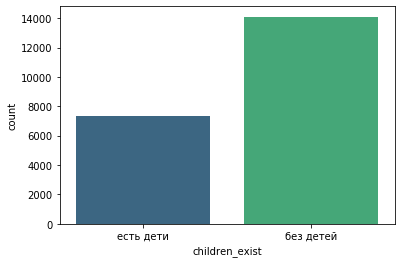

In [61]:
#визуализируем данные
sns.countplot(x = 'children_exist', data = data, palette = 'viridis')

In [62]:
#найдем процент должников

#без детй
otn_1 = (data.loc[(data['children_and_debt'] == 'должник - без детей')].count().sum() / data.loc[(data['children_exist'] == 'без детей')].count().sum()) * 100
print('Процент должников не имеющих детей:', round(otn_1), '%')

#есть дети
otn_2 = (data.loc[(data['children_and_debt'] == 'должник - есть дети')].count().sum() / data.loc[(data['children_exist'] == 'есть дети')].count().sum()) * 100
print('Процент должников имеющих детей:', round(otn_2), '%')

Процент должников не имеющих детей: 8 %
Процент должников имеющих детей: 9 %


In [63]:
#так же нас интересует, влияет ли количество детей в семье на проблемы с выплатами по кредиту

#подсчитаем число клиентов по категориям количества детей
data['children_category'].value_counts()

без детей      14090
есть дети       6907
многодетные      456
Name: children_category, dtype: int64

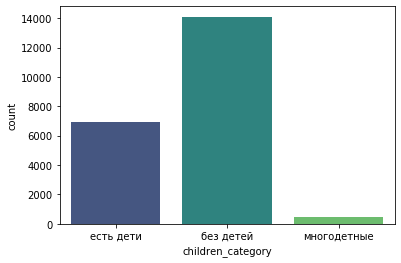

In [64]:
#визуализируем данные
sns.countplot(x = 'children_category', data = data, palette = 'viridis')

In [65]:
#напишем функцию разбивающую на категории плательщиков по платежеспособности и задолженнстям в зависимости от количества детей
def children_and_debt_count(row):
    children = row['children_category']
    debt = row['debt']
   
    #без детей
    if children == 'без детей':
        if debt == 1:
            return 'должник - без детей'
        
    if children == 'без детей':
        if debt == 0:
            return 'плательщик - без детей'
        
    #есть дети (1-2 ребенка)
    if children == 'есть дети':
        if debt == 1:
            return 'должник - есть дети'
        
    if children == 'есть дети':
        if debt == 0:
            return 'плательщик - есть дети'
        
    #многодетные (более 3 детей)
    if children == 'многодетные':
        if debt == 1:
            return 'должник - многодетный'
        
    if children == 'многодетные':
        if debt == 0:
            return 'плательщик - многодетный'
         
#добавим новый столбец
data['children_and_debt_count'] = data.apply(children_and_debt_count, axis=1)

#выведем первые 3 строки таблицы, чтобы проверить новый столбец
data.head(3)    

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_category,purpose_category,children_exist,children_category,children_and_debt,children_and_debt_count
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,высокий достаток,недвижимость,есть дети,есть дети,плательщик - есть дети,плательщик - есть дети
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,средний достаток,автомобиль,есть дети,есть дети,плательщик - есть дети,плательщик - есть дети
2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,средний достаток,недвижимость,без детей,без детей,плательщик - без детей,плательщик - без детей


In [66]:
#найдем процент должников

#без детй
otn_3 = (data.loc[(data['children_and_debt_count'] == 'должник - без детей')].count().sum() / data.loc[(data['children_category'] == 'без детей')].count().sum()) * 100
print('Процент должников не имеющих детей:', round(otn_3), '%')

#есть дети
otn_4 = (data.loc[(data['children_and_debt_count'] == 'должник - есть дети')].count().sum() / data.loc[(data['children_category'] == 'есть дети')].count().sum()) * 100
print('Процент должников имеющих детей:', round(otn_4), '%')

#многодетные
otn_5 = (data.loc[(data['children_and_debt_count'] == 'должник - многодетный')].count().sum() / data.loc[(data['children_category'] == 'многодетные')].count().sum()) * 100
print('Процент многодетных должников:', round(otn_5), '%')

Процент должников не имеющих детей: 8 %
Процент должников имеющих детей: 9 %
Процент многодетных должников: 9 %


### Вывод

В данной выборке число клиентов не имеющие детей берут кредиты чаще, чем клиенты у которых есть дети. Процент клиентов, совершающих выплаты по кредитам в срок среди клиентов не имеющих детей так же выше. Это можно объяснить тем, что при тяжелом финансовом положении человек имеющий детей предпочтет потратить средства на семью, нежели потратить средства на выплату банку.

In [70]:
(data.groupby('children')['debt'].mean()*100).round(2)

children
0      7.54
1      9.17
2      9.45
3      8.18
4      9.76
5      0.00
20    10.53
Name: debt, dtype: float64

<a id='3.2'><a/> 
### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?
[Назад к оглавлению](#back)

In [135]:
#напишем функцию разбивающую на категории по платежеспособности и задолженнстям в зависимости от семейного положения
def family_status_and_debt(row):
    status = row['family_status_id']
    debt = row['debt']
   
    #в браке
    if status == 0:
        if debt == 1:
            return 'должник - в браке'
    if status == 0:
        if debt == 0:
            return 'плательщик - в браке'
        
    #в гражданском браке
    if status == 1:
        if debt == 1:
            return 'должник - в гражданском браке'
    if status == 1:
        if debt == 0:
            return 'плательщик - в гражданском браке'
        
    #вдовец / вдова
    if status == 2:
        if debt == 1:
            return 'должник - вдовец / вдова'
    if status == 2:
        if debt == 0:
            return 'плательщик - вдовец / вдова'
    
    #в разводе
    if status == 3:
        if debt == 1:
            return 'должник - в разводе'
    if status == 3:
        if debt == 0:
            return 'плательщик - в разводе'
        
    #не женат / не замужем
    if status == 4:
        if debt == 1:
            return 'должник - не женат / не замужем'
    if status == 4:
        if debt == 0:
            return 'плательщик - не женат / не замужем'
    
    
#добавим новый столбец
data['family_status_and_debt'] = data.apply(family_status_and_debt, axis=1)

#выведем первые 3 строки таблицы, чтобы проверить новый столбец
data.head(3)    

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_category,purpose_category,children_exist,children_category,children_and_debt,children_and_debt_count,family_status_and_debt
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,высокий достаток,недвижимость,есть дети,есть дети,плательщик - есть дети,плательщик - есть дети,плательщик - в браке
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,средний достаток,автомобиль,есть дети,есть дети,плательщик - есть дети,плательщик - есть дети,плательщик - в браке
2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,средний достаток,недвижимость,без детей,без детей,плательщик - без детей,плательщик - без детей,плательщик - в браке


In [136]:
#подсчитаем число клиентов по категориям
data['family_status'].value_counts()

женат / замужем          12339
гражданский брак          4150
не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

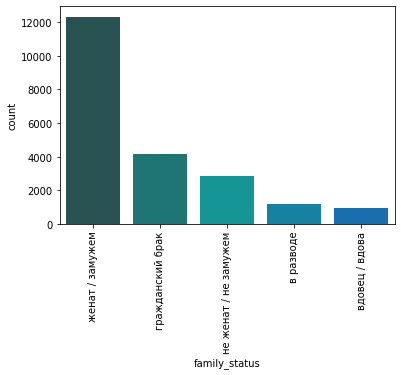

In [137]:
#визуализируем данные
sns.countplot('family_status',data=data,palette='winter_d', order = data['family_status'].value_counts().index)
plt.xticks(rotation=90)

In [138]:
#найдем процент должников

#без детй
otn_6 = (data.loc[(data['family_status_and_debt'] == 'должник - в браке')].count().sum() / data.loc[(data['family_status'] == 'женат / замужем')].count().sum()) * 100
print('Процент должников в браке:', round(otn_6), '%')

#есть дети
otn_7 = (data.loc[(data['family_status_and_debt'] == 'должник - в гражданском браке')].count().sum() / data.loc[(data['family_status'] == 'гражданский брак')].count().sum()) * 100
print('Процент должников в гражданском браке:', round(otn_7), '%')

#многодетные
otn_8 = (data.loc[(data['family_status_and_debt'] == 'должник - не женат / не замужем')].count().sum() / data.loc[(data['family_status'] == 'не женат / не замужем')].count().sum()) * 100
print('Процент холостых должников:', round(otn_8), '%')

#без детй
otn_9 = (data.loc[(data['family_status_and_debt'] == 'должник - в разводе')].count().sum() / data.loc[(data['family_status'] == 'в разводе')].count().sum()) * 100
print('Процент должников в разводе:', round(otn_9), '%')

#есть дети
otn_10 = (data.loc[(data['family_status_and_debt'] == 'должник - вдовец / вдова')].count().sum() / data.loc[(data['family_status'] == 'вдовец / вдова')].count().sum()) * 100
print('Процент вдовствующих должников:', round(otn_10), '%')

Процент должников в браке: 8 %
Процент должников в гражданском браке: 9 %
Процент холостых должников: 10 %
Процент должников в разводе: 7 %
Процент вдовствующих должников: 7 %


### Вывод

По результатам исследования данной выборки, люди состоящие официально в браке или же состоявишие ранее, имеют меньше всего задолженностей по выплатам. Можно сделать вывод, что официальное оформление брака это действительно взятие на себя отвественности и подобная психология у таких клиентов распространяется на другие важные сферы жизни. Самый низкий процент у тех, кто в разводе и потерял супруга, таких людей жизнь закалила еще сильнее.

<a id='3.3'><a/> 
### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
[Назад к оглавлению](#back)

In [71]:
#напишем функцию разбивающую на категории по платежеспособности и задолженнстям в зависимости от уровня дохода
def income_category_and_debt(row):
    income = row['income_category']
    debt = row['debt']
   
    #низкий достаток
    if income == 'низкий достаток':
        if debt == 1:
            return 'должник - низкий достаток'
    if income == 'низкий достаток':
        if debt == 0:
            return 'плательщик - низкий достаток'
        
    #средний достаток
    if income == 'средний достаток':
        if debt == 1:
            return 'должник - средний достаток'
    if income == 'средний достаток':
        if debt == 0:
            return 'плательщик - средний достаток'
        
    #высокий достаток
    if income == 'высокий достаток':
        if debt == 1:
            return 'должник - высокий достаток'
    if income == 'высокий достаток':
        if debt == 0:
            return 'плательщик - высокий достаток'
        
#добавим новый столбец
data['income_category_and_debt'] = data.apply(income_category_and_debt, axis=1)

#выведем первые 3 строки таблицы, чтобы проверить новый столбец
data.head(3)    

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_category,purpose_category,children_exist,children_category,children_and_debt,children_and_debt_count,income_category_and_debt
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,высокий достаток,недвижимость,есть дети,есть дети,плательщик - есть дети,плательщик - есть дети,плательщик - высокий достаток
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,средний достаток,автомобиль,есть дети,есть дети,плательщик - есть дети,плательщик - есть дети,плательщик - средний достаток
2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,средний достаток,недвижимость,без детей,без детей,плательщик - без детей,плательщик - без детей,плательщик - средний достаток


In [72]:
#подсчитаем количество клиентов по уровню достатка
data['income_category'].value_counts()

средний достаток    11251
высокий достаток     9830
низкий достаток       372
Name: income_category, dtype: int64

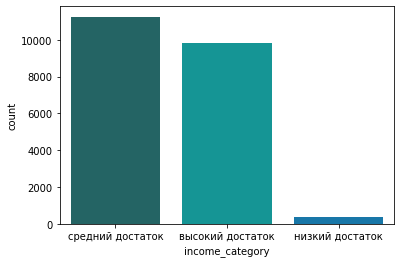

In [73]:
#визуализируем данные
sns.countplot('income_category',data=data,palette='winter_d', order = data['income_category'].value_counts().index)

In [74]:
#низкий достаток
otn_11 = (data.loc[(data['income_category_and_debt'] == 'должник - низкий достаток')].count().sum() / data.loc[(data['income_category'] == 'низкий достаток')].count().sum()) * 100
print('Процент должников с низким достатком:', round(otn_11), '%')

#средний достаток
otn_12 = (data.loc[(data['income_category_and_debt'] == 'должник - средний достаток')].count().sum() / data.loc[(data['income_category'] == 'средний достаток')].count().sum()) * 100
print('Процент должников со средним достатком:', round(otn_12), '%')

#высокий достаток
otn_13 = (data.loc[(data['income_category_and_debt'] == 'должник - высокий достаток')].count().sum() / data.loc[(data['income_category'] == 'высокий достаток')].count().sum()) * 100
print('Процент должников с высоким достатком:', round(otn_13), '%')

Процент должников с низким достатком: 6 %
Процент должников со средним достатком: 8 %
Процент должников с высоким достатком: 8 %


### Вывод

В данной выборке чаще всего кредиты берут люди со среднем достатком. Люди с низким составляют всего около 1% выборки, но выплачивают кредиты исправнее других категорий. Можно сделать предположение, что люди с низким достатком очень тщательно планируют бюджет. Одновременно хорошо распределяют средства и стремятся не тратить лишние деньги на штрафы по просрочкам.

<a id='3.4'><a/> 
### 3.4 Как разные цели кредита влияют на его возврат в срок?
[Назад к оглавлению](#back)

In [76]:
#напишем функцию разбивающую на категории по платежеспособности и задолженнстям в зависимости от уровня дохода
def purpose_category_and_debt(row):
    purpose = row['purpose_category']
    debt = row['debt']
   
    #недвижимость
    if purpose == 'недвижимость':
        if debt == 1:
            return 'должник - недвижимость'
    if purpose == 'недвижимость':
        if debt == 0:
            return 'плательщик - недвижимость'
        
    #образование
    if purpose == 'образование':
        if debt == 1:
            return 'должник - образование'
    if purpose == 'образование':
        if debt == 0:
            return 'плательщик - образование'
        
    #автомобиль
    if purpose == 'автомобиль':
        if debt == 1:
            return 'должник - автомобиль'
    if purpose == 'автомобиль':
        if debt == 0:
            return 'плательщик - автомобиль'
        
    #свадьба
    if purpose == 'свадьба':
        if debt == 1:
            return 'должник - свадьба'
    if purpose == 'свадьба':
        if debt == 0:
            return 'плательщик - свадьба'
        
#добавим новый столбец
data['purpose_category_and_debt'] = data.apply(purpose_category_and_debt, axis=1)

#выведем первые 3 строки таблицы, чтобы проверить новый столбец
data.head(3)  

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_category,purpose_category,children_exist,children_category,children_and_debt,children_and_debt_count,income_category_and_debt,purpose_category_and_debt
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,высокий достаток,недвижимость,есть дети,есть дети,плательщик - есть дети,плательщик - есть дети,плательщик - высокий достаток,плательщик - недвижимость
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,средний достаток,автомобиль,есть дети,есть дети,плательщик - есть дети,плательщик - есть дети,плательщик - средний достаток,плательщик - автомобиль
2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,средний достаток,недвижимость,без детей,без детей,плательщик - без детей,плательщик - без детей,плательщик - средний достаток,плательщик - недвижимость


In [77]:
#подсчитаем количество заявок по каждой категории
data['purpose_category'].value_counts()

недвижимость    10810
автомобиль       4306
образование      4013
свадьба          2324
Name: purpose_category, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

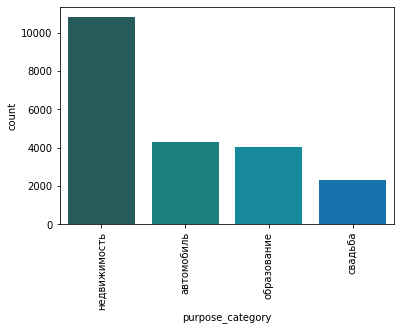

In [78]:
#визуализируем данные
sns.countplot('purpose_category',data=data,palette='winter_d', order = data['purpose_category'].value_counts().index)
plt.xticks(rotation=90)

In [79]:
#найдем процент должников

#недвижимость
otn_14 = (data.loc[(data['purpose_category_and_debt'] == 'должник - недвижимость')].count().sum() / data.loc[(data['purpose_category'] == 'недвижимость')].count().sum()) * 100
print('Процент должников в категории "недвижимость":', round(otn_14), '%')

#автомобиль
otn_15 = (data.loc[(data['purpose_category_and_debt'] == 'должник - автомобиль')].count().sum() / data.loc[(data['purpose_category'] == 'автомобиль')].count().sum()) * 100
print('Процент должников в категории "автомобиль":', round(otn_15), '%')

#образование
otn_16 = (data.loc[(data['purpose_category_and_debt'] == 'должник - образование')].count().sum() / data.loc[(data['purpose_category'] == 'образование')].count().sum()) * 100
print('Процент должников в категории "образование":', round(otn_16), '%')

#свадьба
otn_17 = (data.loc[(data['purpose_category_and_debt'] == 'должник - свадьба')].count().sum() / data.loc[(data['purpose_category'] == 'свадьба')].count().sum()) * 100
print('Процент должников в категории "свадьба":', round(otn_17), '%')

Процент должников в категории "недвижимость": 7 %
Процент должников в категории "автомобиль": 9 %
Процент должников в категории "образование": 9 %
Процент должников в категории "свадьба": 8 %


### Вывод

При изучении данных мы видим, что чаще всего люди берут кредиты на недвижимость. Улулчшение жилищных условий очень актуальная тема для всех слоев населения, но так же есть вероятность, что это самый популярный вид кредита на крупные суммы и его вполне могут брать на какие-то другие цели. Реже всего берут кредиты - на свадьбы, однако выплаты по кредитам взятых на эту цель совершают довольно исправно.

<a id='4'><a/> 
## 4. Общий вывод
[Назад к оглавлению](#back)

Рассмотрим каждый фактор в отдельности:

1. Наличие детей - является скорее минусом, так как в трудном финансовом положении человек, имеющий детей, предпочтет потратить средства на ребенка.
2. Семейное положение - люди состоящие в официальном браке или состояшие в нем раньше более отвественные.
3. Уровень достатка - люди со среднем доходом чаще остальных берут кредиты, однако выплачивают их не очень исправно. В то время как люди с низким достатком имеют меньше просрочек по выплатам. Что касается людей с высоким достатком, появляется вопрос, почему они не очень исправно совершают выплаты. Дело либо в уровне отвественности, либо есть вероятность указания завышенного уровня дохода, для получения более крупного кредита.
4. Цель кредита - самая популярная цель это "недвижимость". По ней так же и меньше всего просрочек с выплатами. Можно предположить, что вопрос улучшения желищных условий действительно важен для людей.

После изучения данных по данной выборке можно сделать заключение, что все 4 фактора, которые мы рассматрелии являются важными в оценке рисков при выдаче кредита. Можно утвержать, что чаще всего кредиты берут люди со средним достатком с целью проведения операций с недвижимостью, не состоящие в официальном браке и неимеющие детей. Самыми надежными клиентами являются люди состоящие (ныне или ранее) в браке, без детей, с низким уровнем достатка и целью получения кредита на недвижимость.